In [3]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import graphviz as gz

In [4]:
df = pd.read_csv("golf2.txt")

In [5]:
df.head()

,Outlook,Temp.,Humidity,Wind,Decision
0,Sunny,85,85,Weak,No
1,Sunny,80,90,Strong,No
2,Overcast,83,78,Weak,Yes
3,Rain,70,96,Weak,Yes
4,Rain,68,80,Weak,Yes


In [6]:
le = preprocessing.LabelEncoder()

In [7]:
for column in df.columns:
    print(column, " -> ",df[column].dtypes)
    
    if df[column].dtypes == 'object':
        le.fit(df[column])
        encoded_features = le.transform(df[column])
        df[column] = pd.DataFrame(encoded_features)
        

Outlook  ->  object
Temp.  ->  int64
Humidity  ->  int64
Wind  ->  object
Decision  ->  object


In [8]:
df.head()

,Outlook,Temp.,Humidity,Wind,Decision
0,2,85,85,1,0
1,2,80,90,0,0
2,0,83,78,1,1
3,1,70,96,1,1
4,1,68,80,1,1


In [9]:
y = df['Decision'].values
x = df.drop(columns = ['Decision']).values

In [10]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [11]:
x

array([[ 2, 85, 85,  1],
       [ 2, 80, 90,  0],
       [ 0, 83, 78,  1],
       [ 1, 70, 96,  1],
       [ 1, 68, 80,  1],
       [ 1, 65, 70,  0],
       [ 0, 64, 65,  0],
       [ 2, 72, 95,  1],
       [ 2, 69, 70,  1],
       [ 1, 75, 80,  1],
       [ 2, 75, 70,  0],
       [ 0, 72, 90,  0],
       [ 0, 81, 75,  1],
       [ 1, 71, 80,  0]])

# Modeling





In [12]:
import lightgbm as lgb

/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [13]:
#df.drop(columns = ['Decision']).columns  -- to get rid of the target 

In [14]:
lgb_train = lgb.Dataset(x, y, feature_name = ['Outlook', 'Temp', 'Humidity', 'Wind'],
                        categorical_feature = ['Outlook', 'Wind'])

In [15]:
params = {
    'boosting_type' :'gbdt'
    , 'objective' : 'multiclass'
    , 'metric' : ',multi_logloss'
    , 'num_class' : len(df.Decision.unique())
    , 'min_data' : 1
}


In [61]:
gbm_model = lgb.train(params, lgb_train, num_boost_round = 100)

LightGBMError: Cannot set categorical feature after freed raw data, set free_raw_data=False when construct Dataset to avoid this.

In [62]:
predictions = gbm_model.predict(x)

In [63]:
predictions

array([[0.99589453, 0.00410547],
       [0.99589453, 0.00410547],
       [0.00235277, 0.99764723],
       [0.00235277, 0.99764723],
       [0.00235277, 0.99764723],
       [0.99589453, 0.00410547],
       [0.00235277, 0.99764723],
       [0.99589453, 0.00410547],
       [0.00235277, 0.99764723],
       [0.00235277, 0.99764723],
       [0.00235277, 0.99764723],
       [0.00235277, 0.99764723],
       [0.00235277, 0.99764723],
       [0.99589453, 0.00410547]])

In [64]:
index = 0
for prediction in predictions:
    if np.argmax(prediction) == 0:
        p = "No"
    else:
        p = "Yes"
    a = y[index]
    if a == 0:
        a = "No"
    else:
        a = "Yes"
    print("Prediction: ", p, "actual prediction is", a)
    
    index = index + 1

Prediction:  No actual prediction is No
Prediction:  No actual prediction is No
Prediction:  Yes actual prediction is Yes
Prediction:  Yes actual prediction is Yes
Prediction:  Yes actual prediction is Yes
Prediction:  No actual prediction is No
Prediction:  Yes actual prediction is Yes
Prediction:  No actual prediction is No
Prediction:  Yes actual prediction is Yes
Prediction:  Yes actual prediction is Yes
Prediction:  Yes actual prediction is Yes
Prediction:  Yes actual prediction is Yes
Prediction:  Yes actual prediction is Yes
Prediction:  No actual prediction is No


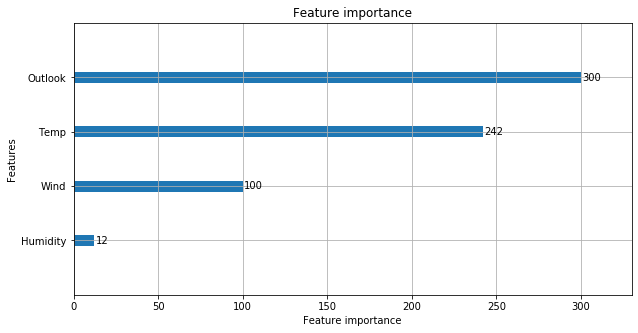

In [70]:
fig_size = [10, 5]
plt.rcParams["figure.figsize"] = fig_size
ax = lgb.plot_importance(gbm_model, max_num_features= 10)

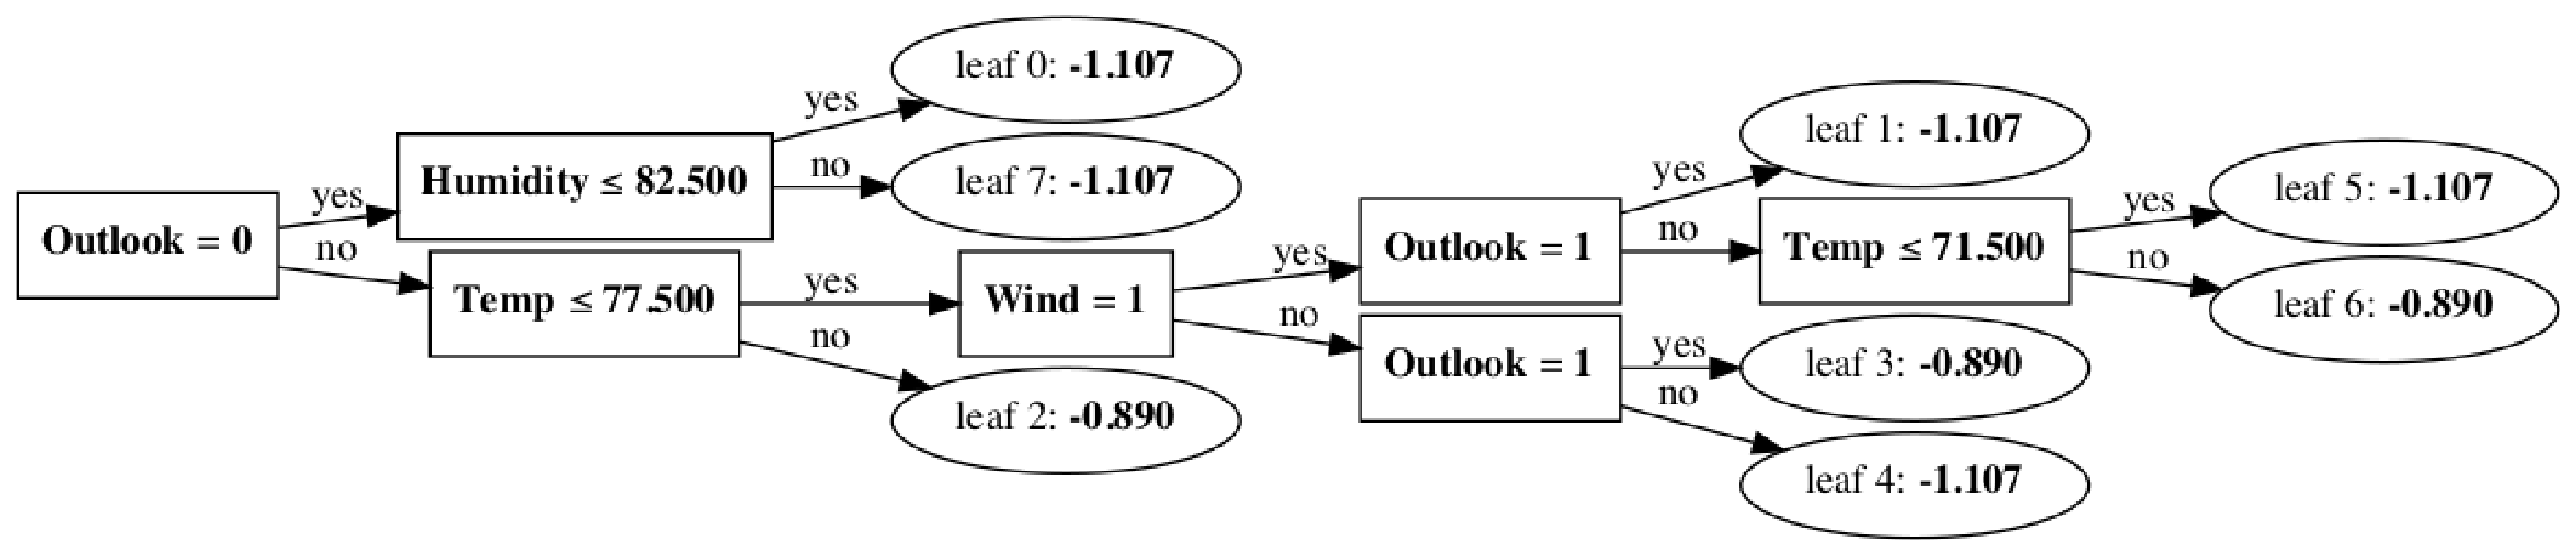

In [71]:
# visualize tree
fig_size = [50, 30]
plt.rcParams["figure.figsize"] = fig_size
ax = lgb.plot_tree(gbm_model)
plt.show()